## Library import

### For data vizualization

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### For data modelling

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn import svm
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier


## Data preprocessing and description

This database contain blocks of the page layout of a document that has been detected by a segmentation process.

The task is to determine the type of block (the target): Text (1), Horizontal line (2), Graphic (3), Vertical line (4) or Picture (5).


### Preprocessing

In [3]:
df = pd.read_table('page-blocks.data', delim_whitespace= True)

We must add the columns becaus ethe file is of .data file type and there is no columns

In [4]:
columns = ['height',
'lenght',
'area',
'eccen',
'p_black',
'p_and',
'mean_tr',
'blackpix',
'blackand',
'wb_trans',
'target']

In [5]:
df.columns = columns

In [6]:
df.to_csv('data.csv',sep=',')

In [7]:
df.head(100)

,height,lenght,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,target
0,6,7,42,1.167,0.429,0.881,3.60,18,37,5,1
1,6,18,108,3.000,0.287,0.741,4.43,31,80,7,1
2,5,7,35,1.400,0.371,0.743,4.33,13,26,3,1
3,6,3,18,0.500,0.500,0.944,2.25,9,17,4,1
4,5,8,40,1.600,0.550,1.000,2.44,22,40,9,1
...,...,...,...,...,...,...,...,...,...,...,...
95,2,48,96,24.000,0.625,0.677,30.00,60,65,2,2
96,11,65,715,5.909,0.390,0.877,2.61,279,627,107,1
97,9,37,333,4.111,0.526,0.898,3.18,175,299,55,1
98,9,21,189,2.333,0.291,0.762,1.57,55,144,35,1


### Description

In [8]:
#variables and target data types

df.dtypes

height        int64
lenght        int64
area          int64
eccen       float64
p_black     float64
p_and       float64
mean_tr     float64
blackpix      int64
blackand      int64
wb_trans      int64
target        int64
dtype: object

In [9]:
#we have to change the datatype of target for it to be a category like datatype according to the data description

#df['target'] = df['target'].astype('category')

In [10]:
#Now we have all the variables with the right data types
#df.dtypes

In [11]:
#target different values and their counts

df.target.value_counts()

1    4912
2     329
5     115
4      88
3      28
Name: target, dtype: int64

We can see that a very large part of target values corresponds to Text (1) which is realistic

In [12]:
# To see if there is missing values within each columns

df.isna().sum()

height      0
lenght      0
area        0
eccen       0
p_black     0
p_and       0
mean_tr     0
blackpix    0
blackand    0
wb_trans    0
target      0
dtype: int64

There is no missing values, we don't need to add values

In [13]:
# To describe the data frame with numerical values

df.describe()


,height,lenght,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,target
count,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000
mean,10.474232,89.583333,1198.618238,13.756235,0.368637,0.785076,6.219989,365.995066,741.239401,106.681287,1.202668
std,18.962152,114.726810,4849.794609,30.706089,0.177772,0.170668,69.085314,1270.440262,1881.651196,167.318116,0.721531
min,1.000000,1.000000,7.000000,0.007000,0.052000,0.062000,1.000000,7.000000,7.000000,1.000000,1.000000
25%,7.000000,17.000000,114.000000,2.143000,0.261000,0.679000,1.610000,42.000000,95.000000,17.000000,1.000000
50%,8.000000,41.000000,322.000000,5.167000,0.337000,0.803500,2.070000,108.000000,250.000000,49.000000,1.000000
75%,10.000000,107.000000,980.000000,13.625000,0.426000,0.927000,3.000000,284.000000,718.000000,126.000000,1.000000
max,804.000000,553.000000,143993.000000,537.000000,1.000000,1.000000,4955.000000,33017.000000,46133.000000,3212.000000,5.000000


We can see the the mean, min value and max value for each features

In [14]:
# To describe the dataset with categorical values

#df['target'].describe()

In [15]:
#df.mean_tr

## Data Vizualisation

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


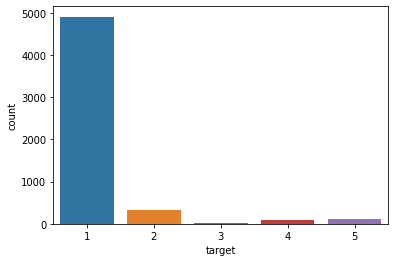

In [16]:
#counts of observations in each category
sns.countplot(df['target']);

As we said before, there is a large part of target values belonging to a text classification the least represented one is 3 and corresponds to graphics.

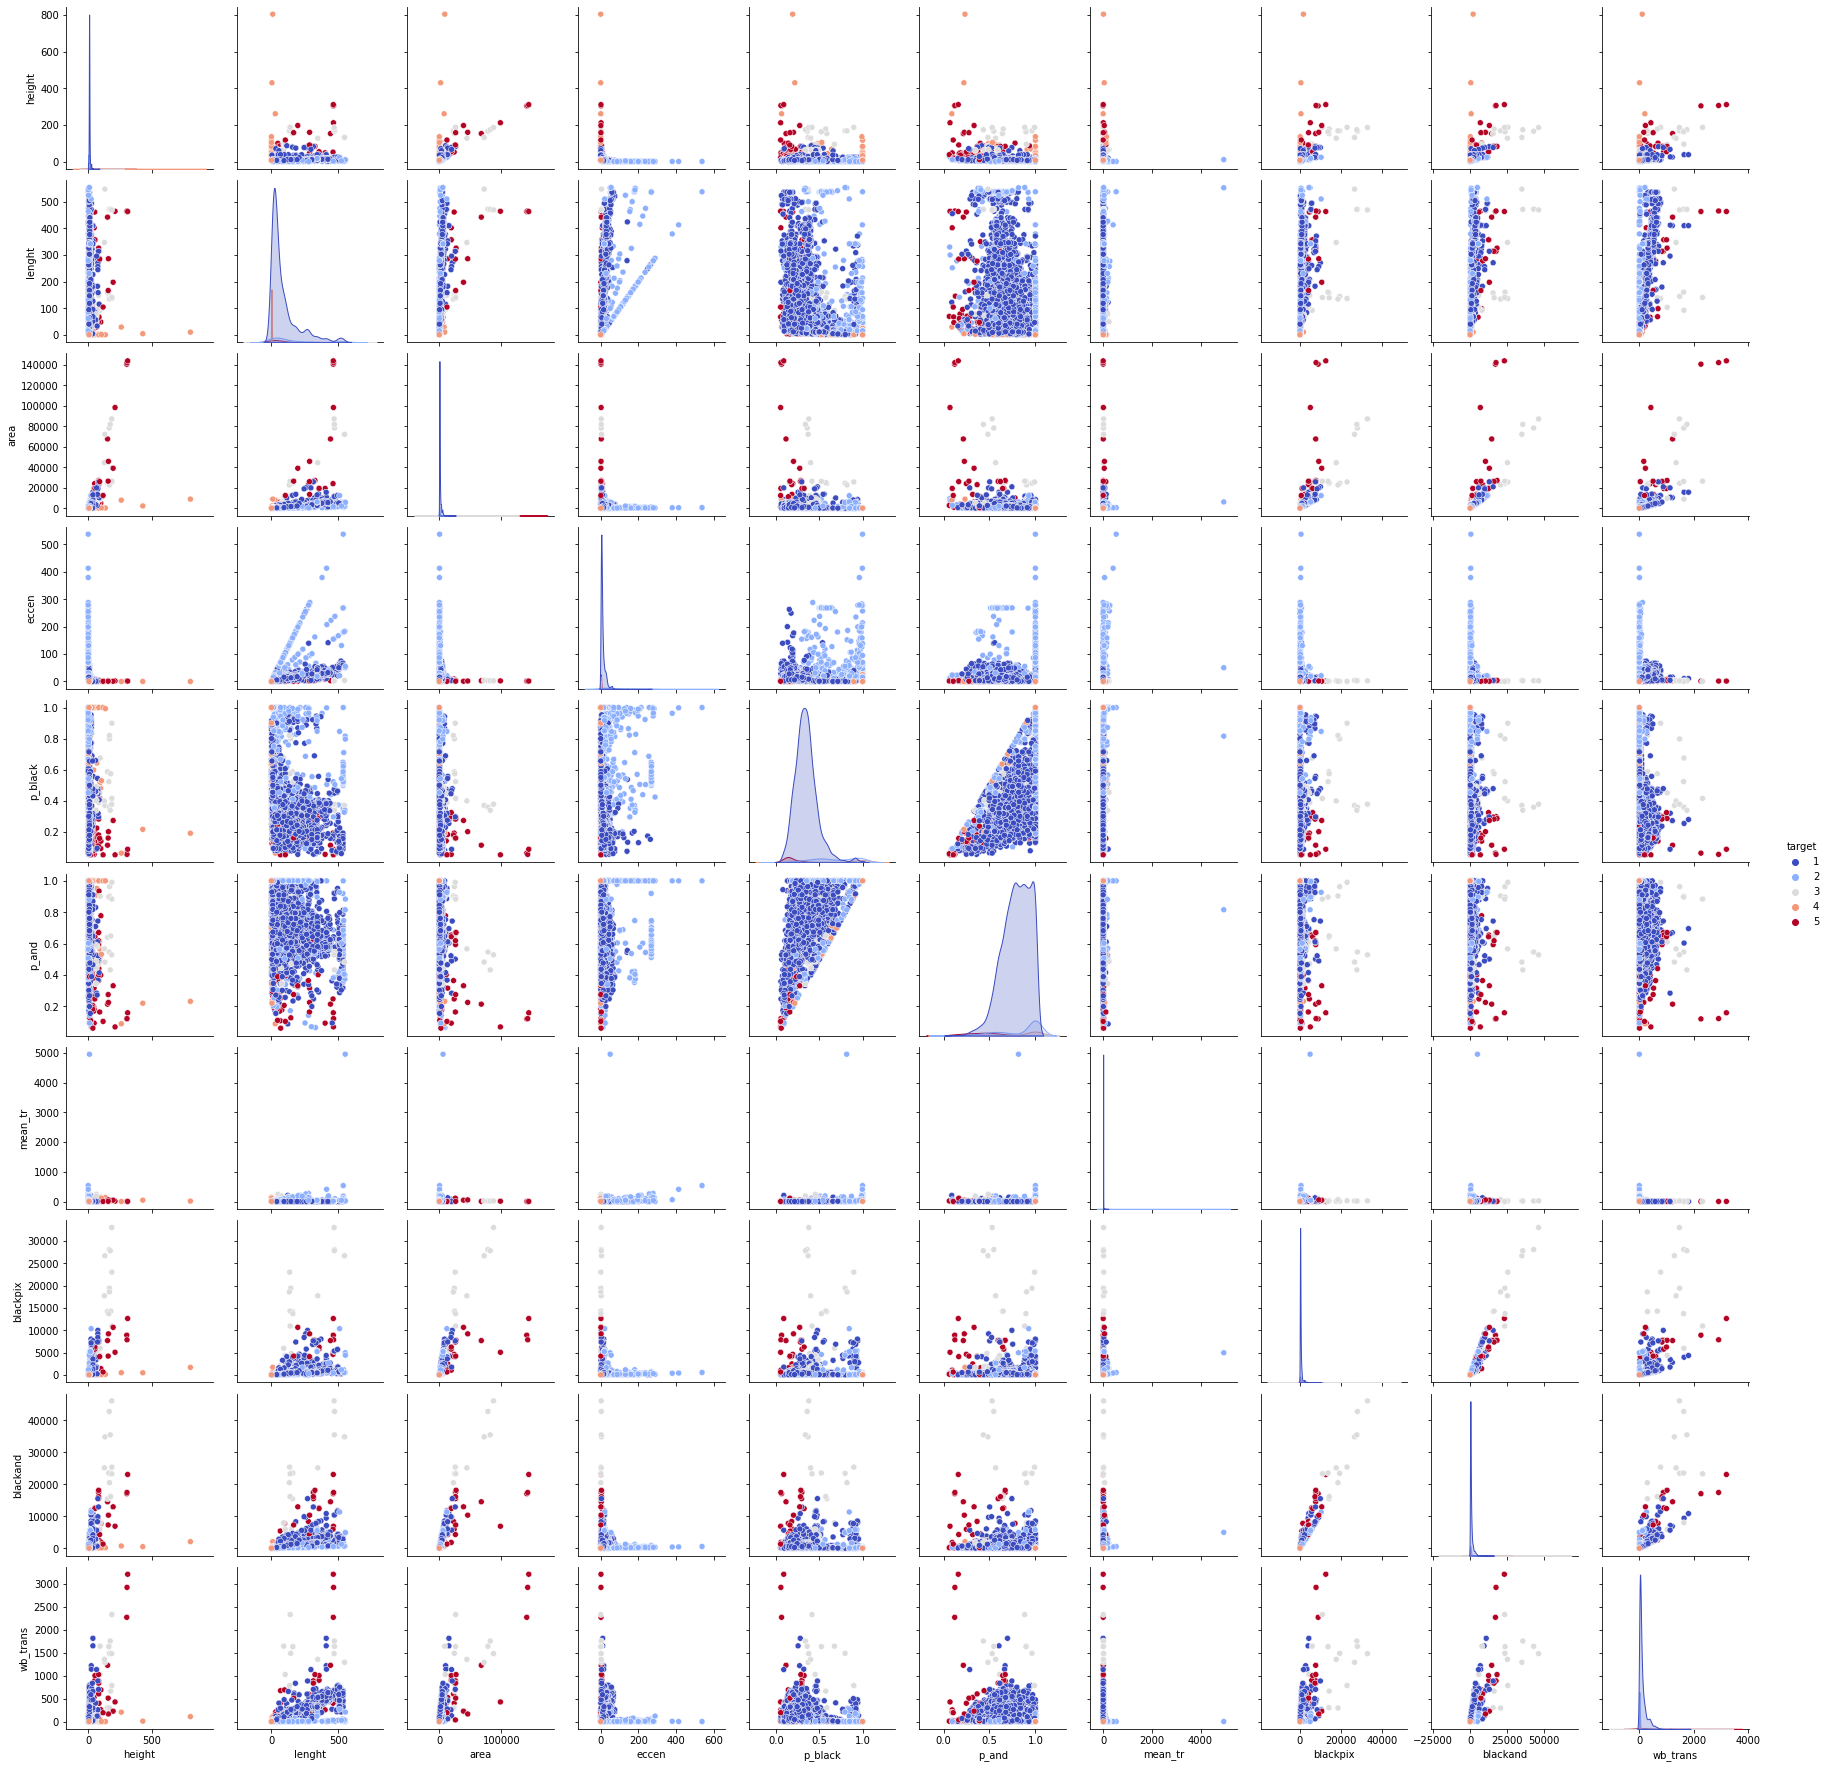

In [98]:
#diagram of all dependent features
plot = sns.pairplot(data = df, hue="target" ,palette='coolwarm')



Here we can see all the dependant features and how they interact with each other.
For example, we can see that p_black and lenght are highly dependant of each other since all the values are covered by their computation.


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


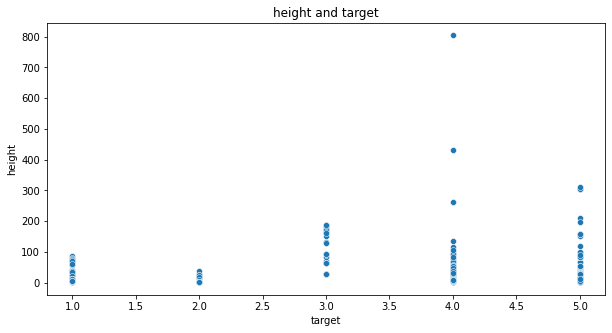

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


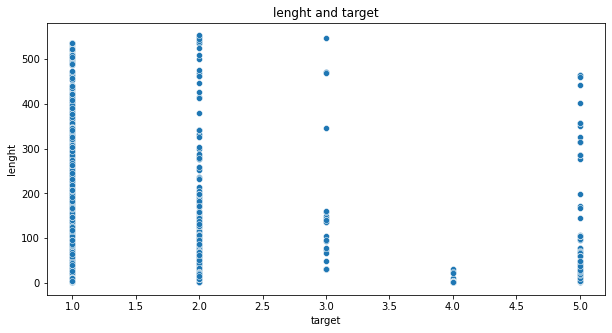

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


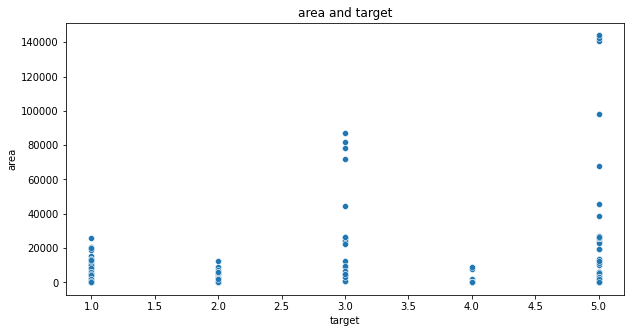

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


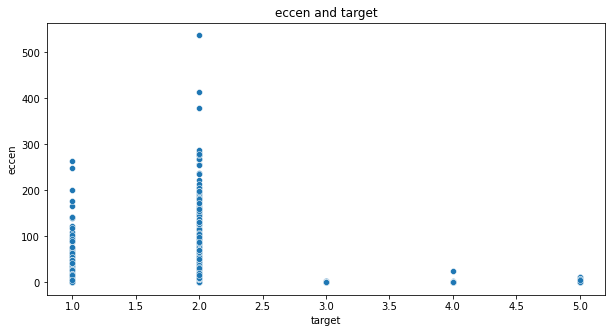

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


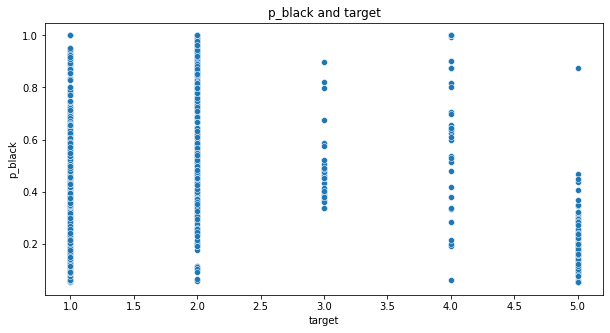

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


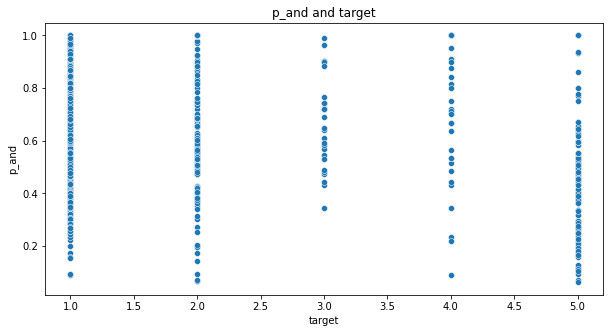

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


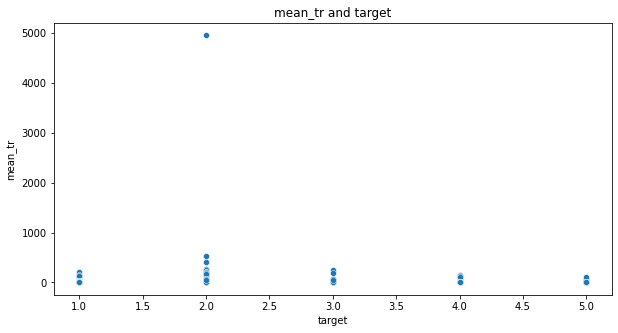

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


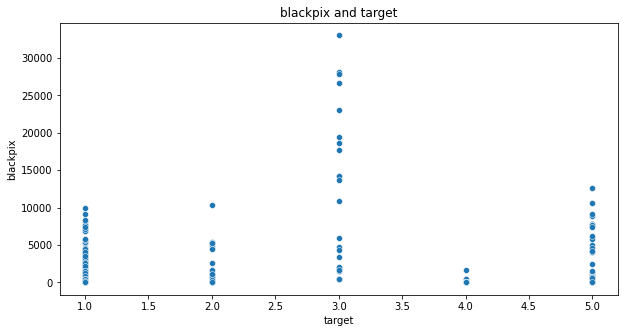

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


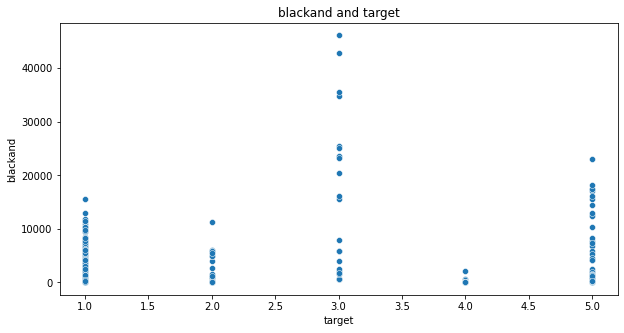

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


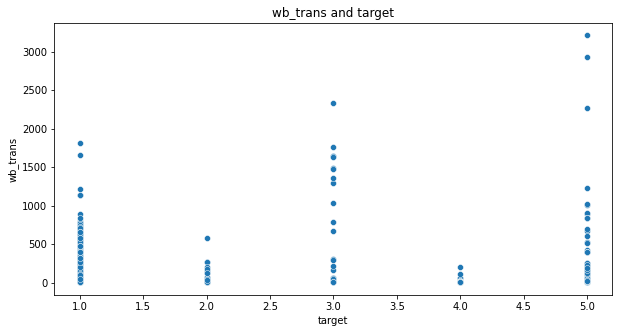

In [18]:
# relations between the target and the different features
for i in range (len(columns)-1):
    plt.figure(figsize=(10,5))
    plt.title(columns[i]+' '+'and target')
    plt.xlabel('target')
    plt.ylabel(columns[i])
    sns.scatterplot(df['target'],df[columns[i]])
    plt.show()


Since the target is of category data type, every features have the same relations with the target. But here we can't see precisely  who is the dominant category for some features

In [19]:
#adjusts the points along the categorical axis using an algorithm that prevents them from overlapping.
#but the dataset is too long to work correctly

#for i in range (len(columns)-1):
#    sns.catplot(x="target", y=columns[i], kind="swarm",data= df)


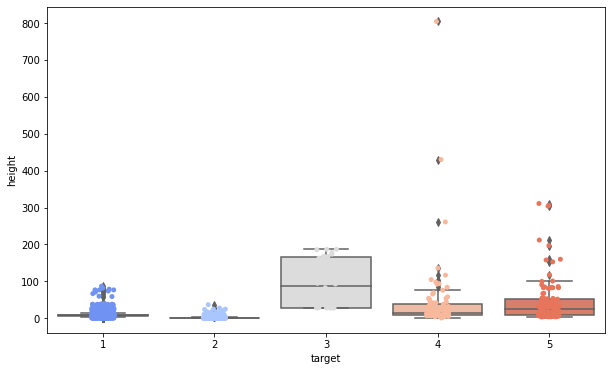

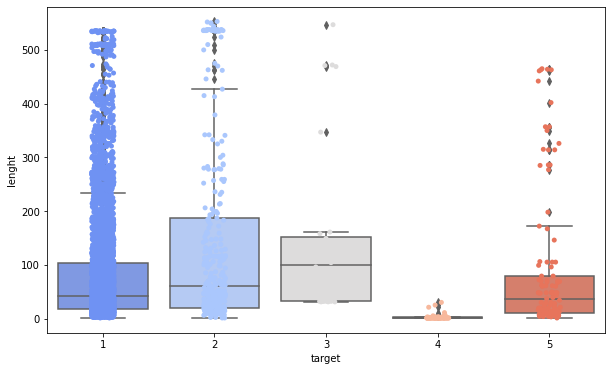

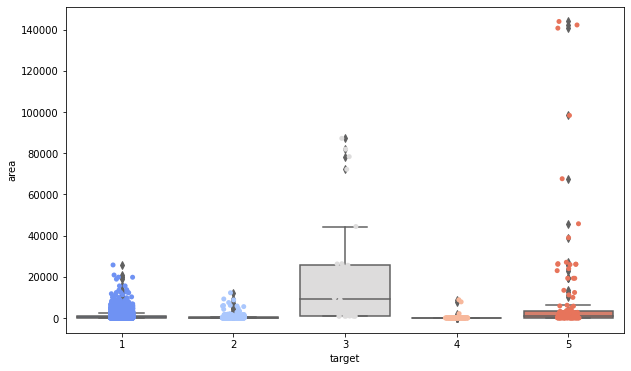

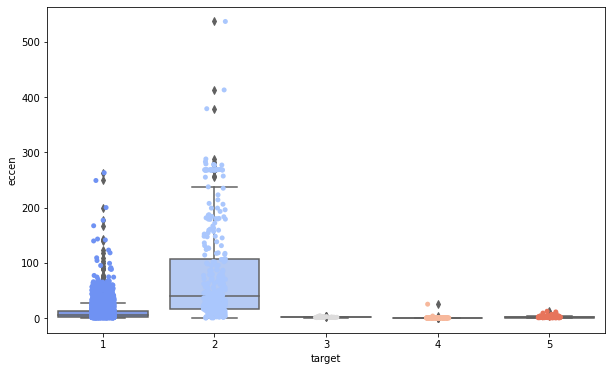

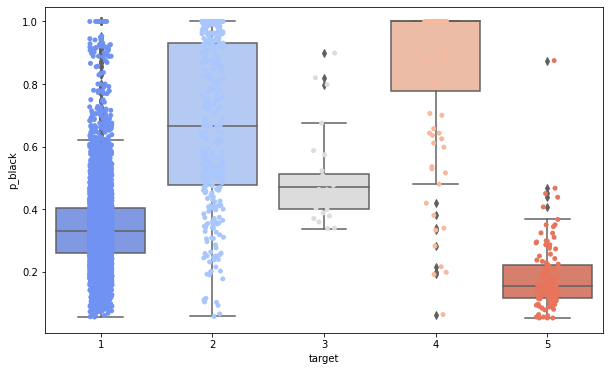

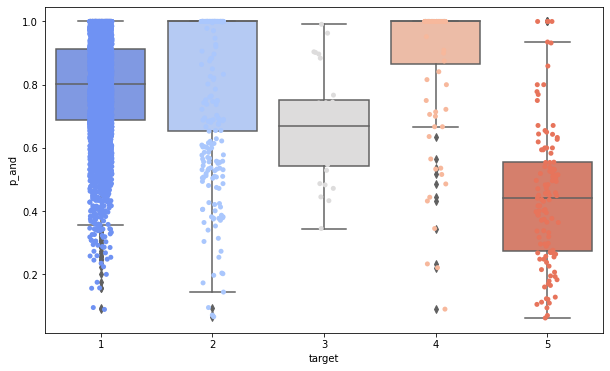

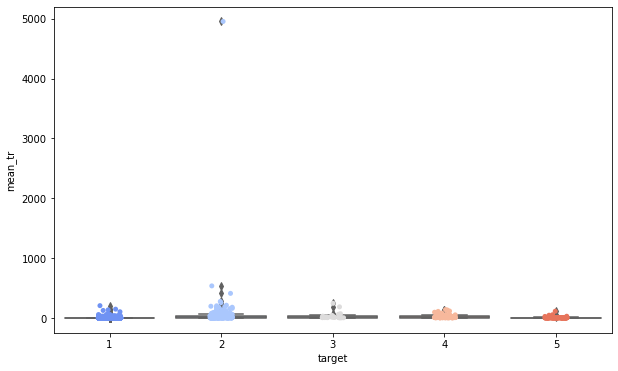

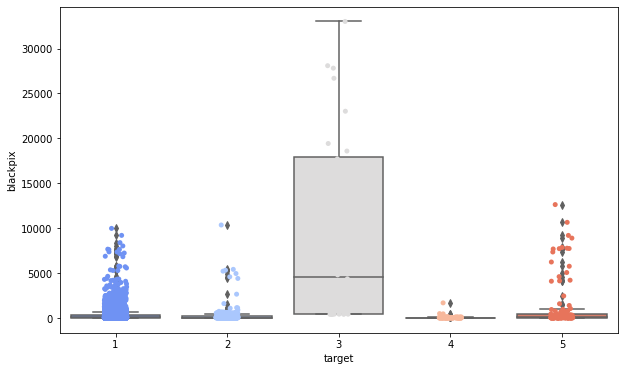

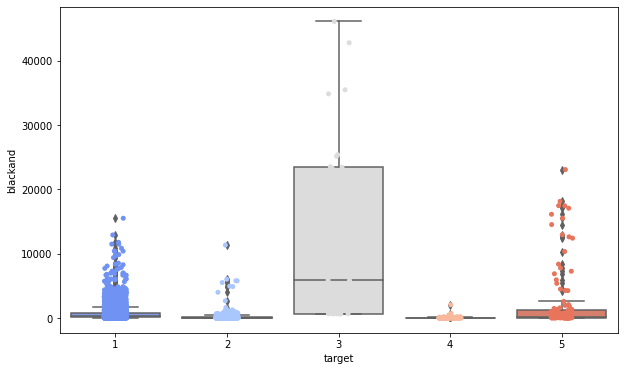

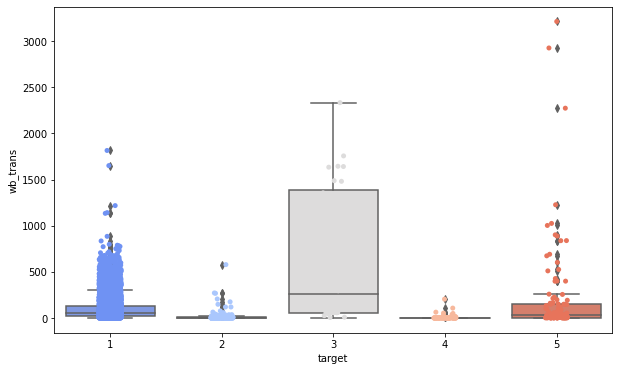

In [20]:
for i in range(len(columns)-1):
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df,x='target',y=columns[i],palette='coolwarm')
    sns.stripplot(data=df,x='target',y=columns[i],palette='coolwarm')
    plt.plot()

We can see with the boxplot that every features have at least one prominent target except for mean_tr which corresponds to the mean number of white-black transitions (blackpix / wb_trans).
This is happening because in every page block type you have about the same values for mean_tr

In [21]:
df.mean_tr.describe()

count    5472.000000
mean        6.219989
std        69.085314
min         1.000000
25%         1.610000
50%         2.070000
75%         3.000000
max      4955.000000
Name: mean_tr, dtype: float64

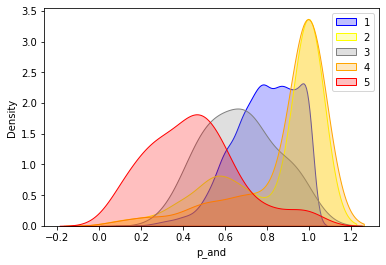

In [22]:
plot = sns.kdeplot(df.loc[ df.target == 1, "p_and"], color="Blue", shade=True)
plot = sns.kdeplot(df.loc[ df.target == 2, "p_and"], color="Yellow", shade=True)
plot = sns.kdeplot(df.loc[ df.target == 3, "p_and"], color="Grey", shade=True)
plot = sns.kdeplot(df.loc[ df.target == 4, "p_and"], color="Orange", shade=True)
plot = sns.kdeplot(df.loc[ df.target == 5, "p_and"], color="Red", shade=True)
plot.legend(["1", "2", "3", "4", "5"])

Here we see with the density function the proportion of each target values for the feature p_and.

<AxesSubplot:>

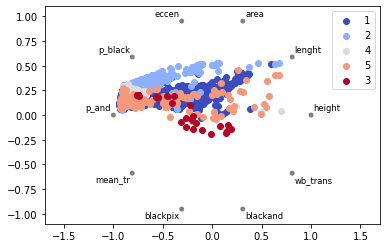

In [23]:

pd.plotting.radviz(df, "target", colormap='coolwarm')


This graph allows to project our 10-dimensional data set into a 2D space where the influence of each dimension can be interpreted as a balance between the influence of all dimensions.

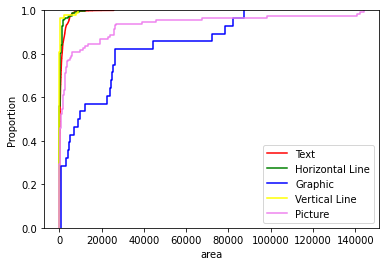

In [24]:
plot = sns.ecdfplot(df.loc[ df.target == 1, "area"], color="Red")
plot = sns.ecdfplot(df.loc[ df.target == 2, "area"], color="Green")
plot = sns.ecdfplot(df.loc[ df.target == 3, "area"], color="Blue")
plot = sns.ecdfplot(df.loc[ df.target == 4, "area"], color="Yellow")
plot = sns.ecdfplot(df.loc[ df.target == 5, "area"], color="Violet")
plot.legend(["Text", "Horizontal Line", "Graphic", "Vertical Line", "Picture"])

This plot allow us the proportion of each target in function of the value of the area feature.
We can see that for small areas, the page block corresponds more to Text, Horizontal Line or Vertical Line and for big areas, the target will more likely be a Graphic or a Picture, which is very plausible.

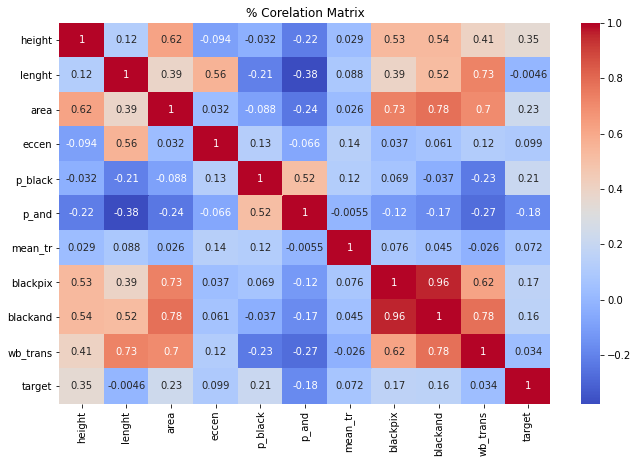

In [100]:
#corelation matrix
plt.figure(figsize=(11,7))
sns.heatmap(annot=True,data=df.corr(),cmap='coolwarm')
plt.title('% Corelation Matrix')
plt.savefig('corrmat.png')
plt.show()



Here we can see thanks to the correlation matrix that the most correlated features are blackpix (Total number of black pixels in the original bitmap of the block) and black_and(Total number of black pixels in the bitmap of the block after the RLSA.) with 96% correlation.

## Data modelization
## Preprocessing
First let's split the data into a train set and test set
fisrt lets scale the data for a better normalization of data and speed up calculations 
 see the least correlated features to the target


We drop the target from the features to be able to predict the target later

In [26]:
x, y = df.drop("target", axis=1), df.target

let's scale the data for a better normalization of data and speed up calculations

In [27]:
from sklearn.preprocessing import scale

In [28]:
x = pd.DataFrame(scale(x))

let's split the data into a train set and test set

In [29]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Logistic Regression

### Modelling and Predictions

In [30]:
#Modelling
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
#Predictions
y_pred = model.predict(x_test)



### Performance

In [31]:
import numpy as np
import tensorflow as tf

Calculating accuracy using keras method

In [32]:
metric = tf.keras.metrics.Accuracy()
metric.update_state(y_test,y_pred)


<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=1095.0>

In [33]:
print('Logistic regression accuracy :', round(metric.result().numpy(),4))

Logistic regression accuracy : 0.9553


### Comparing predictions with actual 

In [34]:

from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

Classfication Report

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      0.99      0.98       979
           2       0.91      0.70      0.79        71
           3       0.80      0.57      0.67         7
           4       0.92      0.86      0.89        14
           5       0.83      0.42      0.56        24

    accuracy                           0.96      1095
   macro avg       0.89      0.71      0.78      1095
weighted avg       0.95      0.96      0.95      1095



Confusion Matrix

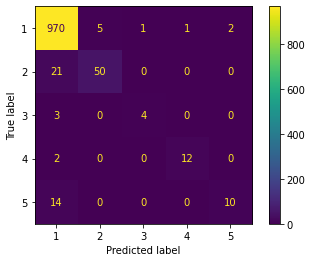

In [36]:

plot_confusion_matrix(model, X=x_test, y_true=y_test)


We can see that a large ppart of predictions corresponds to text classification.
Also with logistic regression we can see that 15 predicted values corresponfing to 1 were wrongly predicted (they belong to 2 (horizontal line))

## KNN Algorithm

We must find the numbers of neighbors N which allows the best accuracy

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


([<matplotlib.axis.XTick at 0x7f588ad2e8d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

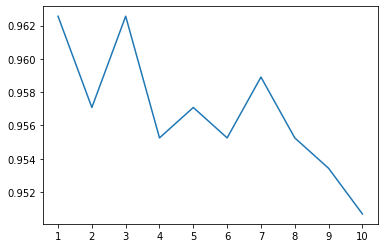

In [37]:
neighbours=list(range(1,11))
accuracy=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for n in neighbours:
    model=KNeighborsClassifier(n_neighbors=n) 
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy=accuracy.append(pd.Series(metrics.accuracy_score(y_pred,y_test)))
plt.plot(neighbours, accuracy)
plt.xticks(x)

Best accuracy for K-nearest neighbors is for N=5

### Modelling and Predictions

In [38]:
#Modelling
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)

#Predicitons
y_pred=model.predict(x_test)

### Performance

Calculating accuracy using keras method

In [39]:
metric = tf.keras.metrics.Accuracy()
metric.update_state(y_test,y_pred)
print('K-nearest Neighbors accuracy :', round(metric.result().numpy(),4))

K-nearest Neighbors accuracy : 0.9571


The accuracy is better than the logistic regression

### Comparing predictions with actual 

Classfication Report

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      0.99      0.98       979
           2       0.96      0.75      0.84        71
           3       0.67      0.86      0.75         7
           4       0.89      0.57      0.70        14
           5       0.69      0.38      0.49        24

    accuracy                           0.96      1095
   macro avg       0.83      0.71      0.75      1095
weighted avg       0.95      0.96      0.95      1095



Classification report allows us to see th main classification metrics

Confusion Matrix

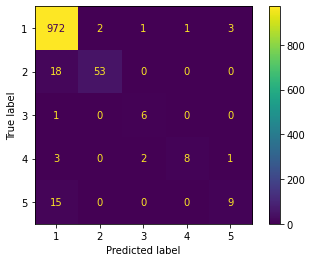

In [41]:
plot_confusion_matrix(model, X=x_test, y_true=y_test)

## Decision Tree

### Modelling and Predictions

In [42]:
#Modelling
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

#Predicitons
y_pred=model.predict(x_test)

### Performance

Calculating accuracy using keras method

In [43]:
metric = tf.keras.metrics.Accuracy()
metric.update_state(y_test,y_pred)
print('Decision tree accuracy :', round(metric.result().numpy(),4))

Decision tree accuracy : 0.958


Classification report

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.98      0.98       979
           2       0.92      0.79      0.85        71
           3       0.83      0.71      0.77         7
           4       0.73      0.79      0.76        14
           5       0.62      0.67      0.64        24

    accuracy                           0.96      1095
   macro avg       0.81      0.79      0.80      1095
weighted avg       0.96      0.96      0.96      1095



Confusion Matrix

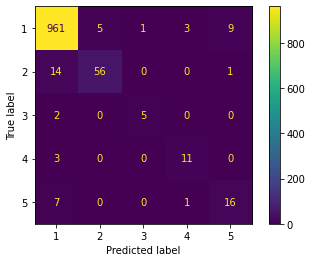

In [45]:
plot_confusion_matrix(model, X=x_test, y_true=y_test)

In [46]:
model.feature_importances_

array([0.44832976, 0.00633998, 0.01777453, 0.27105944, 0.07039529,
       0.02728034, 0.0996916 , 0.02555071, 0.01726248, 0.01631585])

Text(0.5, 1.0, 'feature importance')

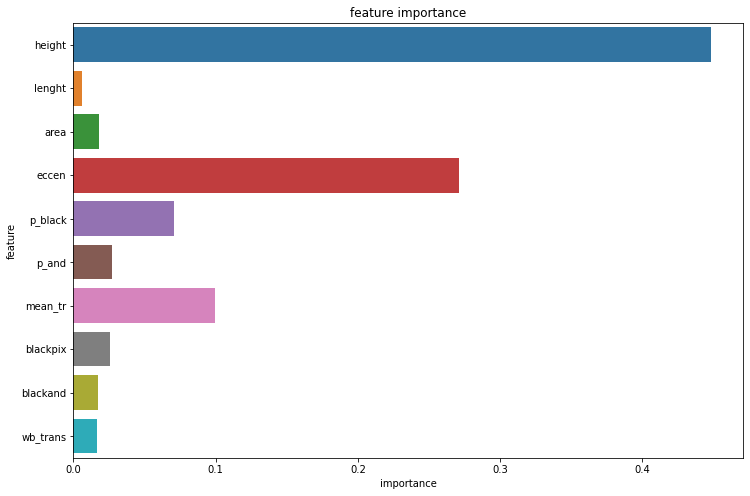

In [47]:
plt.figure(figsize=(12,8))
data=pd.DataFrame({'feature':df.drop("target",axis=1).columns,"importance":model.feature_importances_})
sns.barplot(data=data,y='feature',x='importance')
plt.title('feature importance')

Here we can see that the most important features are height eccen and mean-tr surprisingly even though they're not the best correlated features to target

## Random Forest

### Modelling and Predictions

For 10 trees:

In [48]:
#Modelling
model = RandomForestClassifier(n_estimators=10)

#Prediction
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [49]:
metric = tf.keras.metrics.Accuracy()
metric.update_state(y_test,y_pred)
print('Random Forest tree accuracy with 10 trees :', round(metric.result().numpy(),4))


Random Forest tree accuracy with 10 trees : 0.9699


For 20 trees:

In [50]:
#Modelling
model = RandomForestClassifier(n_estimators=20)

#Prediction
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [51]:
metric = tf.keras.metrics.Accuracy()
metric.update_state(y_test,y_pred)
print('Random Forest tree accuracy with 20 trees :', round(metric.result().numpy(),4))


Random Forest tree accuracy with 20 trees : 0.9726


#### Random forest for 100 trees (best)

In [52]:
#Modelling
model = RandomForestClassifier(n_estimators=100)

#Prediction
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [53]:
metric = tf.keras.metrics.Accuracy()
metric.update_state(y_test,y_pred)
print('Random Forest tree accuracy with 100 trees :', round(metric.result().numpy(),4))

Random Forest tree accuracy with 100 trees : 0.9726


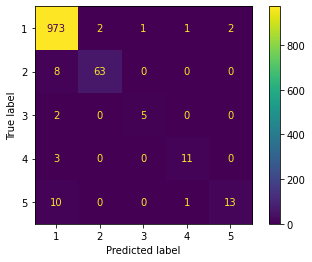

In [54]:
plot_confusion_matrix(model, X=x_test, y_true=y_test)

We can see the more we add trees to the forest, more the model get accurate. We will tune the hyperparameters later...

Text(0.5, 1.0, 'feature importance')

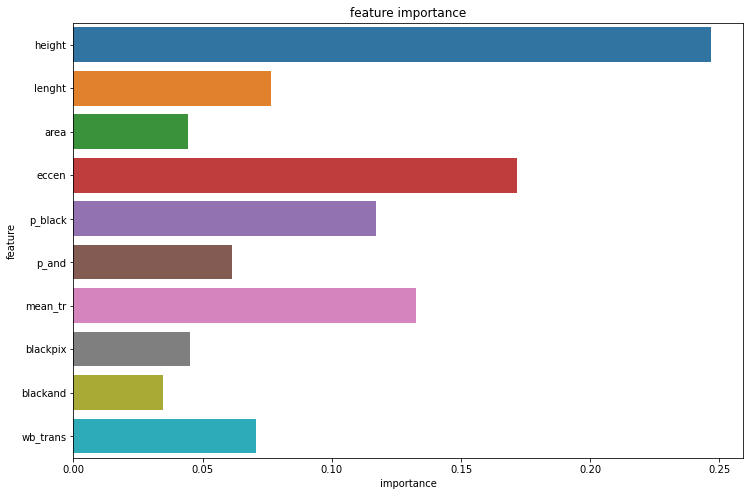

In [55]:
plt.figure(figsize=(12,8))
data=pd.DataFrame({'feature':df.drop("target",axis=1).columns,"importance":model.feature_importances_})
sns.barplot(data=data,y='feature',x='importance')
plt.title('feature importance')

Here the most important features to the modelling is also height, eccen and mean_tr

## Boosting

### Modelling and Predicitons

For 10 trees

In [56]:
#Modelling
model = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=10, learning_rate=1)

#Prediction
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [57]:
metric = tf.keras.metrics.Accuracy()
metric.update_state(y_test,y_pred)
print('Boosting accuracy with 10 trees:', round(metric.result().numpy(),4))


Boosting accuracy with 10 trees: 0.9607


#### Boosting with 20 trees (best)

In [58]:
#Modelling
model = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=20, learning_rate=1)

#Prediction
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [59]:
metric = tf.keras.metrics.Accuracy()
metric.update_state(y_test,y_pred)
print('Boosting accuracy with 20 trees :', round(metric.result().numpy(),4))


Boosting accuracy with 20 trees : 0.9635


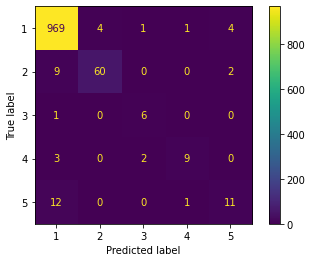

In [60]:
plot_confusion_matrix(model, X=x_test, y_true=y_test)

For 100 trees

In [61]:
#Modelling
model = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=100, learning_rate=1)

#Prediction
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [62]:
metric = tf.keras.metrics.Accuracy()
metric.update_state(y_test,y_pred)
print('Boosting accuracy with 100 trees :', round(metric.result().numpy(),4))

Boosting accuracy with 100 trees : 0.9717


the best boosting model is for 20 trees. For 100 trees, the model may overfit.

## Bagging

### Modelling and Predicitons 

#### Bagging with 10 trees

In [63]:
#Modelling
model = BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5, max_features=1, n_estimators=10)

#Prediction
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [64]:
metric = tf.keras.metrics.Accuracy()
metric.update_state(y_test,y_pred)
print('Bagging accuracy for 10 trees :', round(metric.result().numpy(),4))


Bagging accuracy for 10 trees : 0.895


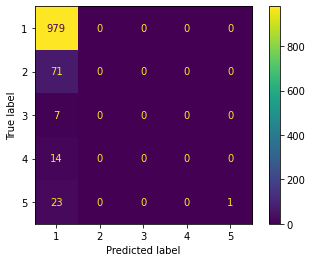

In [65]:
plot_confusion_matrix(model, X=x_test, y_true=y_test)

For 20 trees

In [66]:
#Modelling
model = BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5, max_features=1, n_estimators=20)

#Prediction
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [67]:
metric = tf.keras.metrics.Accuracy()
metric.update_state(y_test,y_pred)
print('Bagging accuracy for 20 trees:', round(metric.result().numpy(),4))

Bagging accuracy for 20 trees: 0.8959


For 100 trees

In [68]:
#Modelling
model = BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5, max_features=1, n_estimators=100)

#Prediction
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [69]:
metric = tf.keras.metrics.Accuracy()
metric.update_state(y_test,y_pred)
print('Bagging accuracy for 100 trees:', round(metric.result().numpy(),4))

Bagging accuracy for 100 trees: 0.9014


the best bagging model is with 10 trees

## data modelization dropping least correlated features

Let's find and drop the least correlated features to target

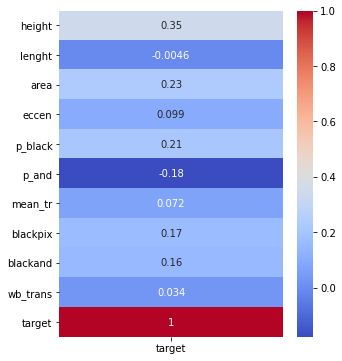

In [70]:
plt.figure(figsize=(5,6)) 
sns.heatmap(df.corr()[['target']], annot=True,cmap='coolwarm')
plt.show()

We can see that wb_trans, mean_tr and lenght are the least correlated features to target, hence we are going to drop them. Also, we are going to change the dtype of target as category.

In [71]:

x, y = df.drop(["lenght", "wb_trans","mean_tr","target"],axis=1), df.target
x = pd.DataFrame(scale(x))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Logistic regression

In [72]:
#Modelling
model = LogisticRegression(max_iter=100000)
model.fit(x_train,y_train)
#Predictions
y_pred = model.predict(x_test)

metric = tf.keras.metrics.Accuracy()
metric.update_state(y_test,y_pred)
print('Logisitc regression accuracy  :', round(metric.result().numpy(),4))

Logisitc regression accuracy  : 0.9653


### KNN Algorithm

In [73]:
#Modelling
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
#Predictions
y_pred = model.predict(x_test)

metric = tf.keras.metrics.Accuracy()
metric.update_state(y_test,y_pred)
print('KNN accuracy  :', round(metric.result().numpy(),4))

KNN accuracy  : 0.9699


### Decision Tree

In [74]:
#Modelling
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
#Predictions
y_pred = model.predict(x_test)

metric = tf.keras.metrics.Accuracy()
metric.update_state(y_test,y_pred)
print('Decision Tree accuracy  :', round(metric.result().numpy(),4))

Decision Tree accuracy  : 0.9662


Text(0.5, 1.0, 'feature importance')

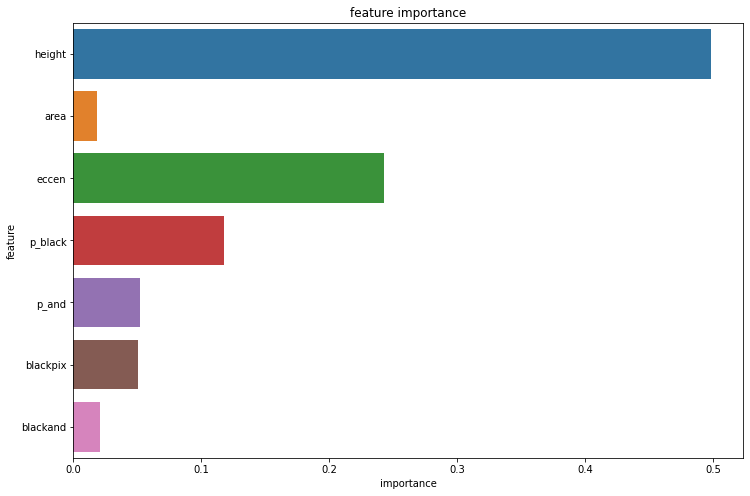

In [75]:
plt.figure(figsize=(12,8))
data=pd.DataFrame({'feature':df.drop(["lenght", "wb_trans","mean_tr","target"],axis=1).columns,"importance":model.feature_importances_})
sns.barplot(data=data,y='feature',x='importance')
plt.title('feature importance')

### Random Forest with 100 trees

In [76]:
#Modelling
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
#Predictions
y_pred = model.predict(x_test)

metric = tf.keras.metrics.Accuracy()
metric.update_state(y_test,y_pred)
print('Random Forest accuracy  :', round(metric.result().numpy(),4))

Random Forest accuracy  : 0.9726


Text(0.5, 1.0, 'feature importance')

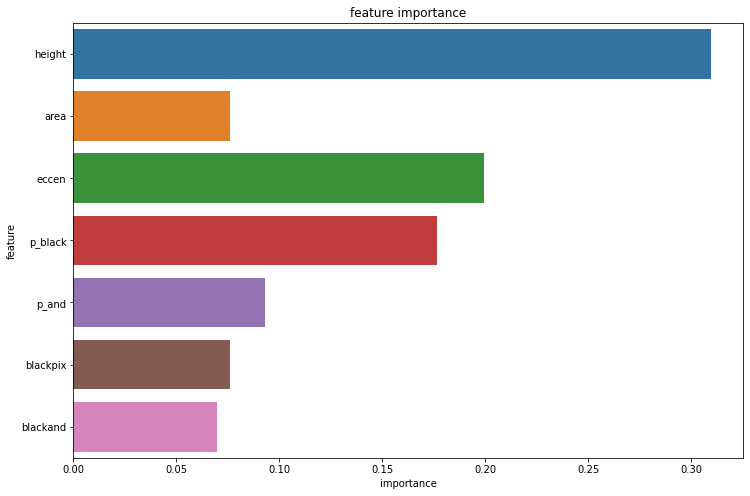

In [77]:
plt.figure(figsize=(12,8))
data=pd.DataFrame({'feature':df.drop(["lenght", "wb_trans","mean_tr","target"],axis=1).columns,"importance":model.feature_importances_})
sns.barplot(data=data,y='feature',x='importance')
plt.title('feature importance')

### Bagging

In [78]:
#Modelling
model = BaggingClassifier(n_estimators=100)
model.fit(x_train,y_train)
#Predictions
y_pred = model.predict(x_test)

metric = tf.keras.metrics.Accuracy()
metric.update_state(y_test,y_pred)
print('Bagging accuracy  :', round(metric.result().numpy(),4))

Bagging accuracy  : 0.9726


### Boosting

In [79]:
#Modelling
model = AdaBoostClassifier(n_estimators=20)
model.fit(x_train,y_train)
#Predictions
y_pred_boost = model.predict(x_test)

metric = tf.keras.metrics.Accuracy()
metric.update_state(y_test,y_pred_boost)
print('Boosting accuracy  :', round(metric.result().numpy(),4))

Boosting accuracy  : 0.9306


The accuracy enhanced since we dropped the least correlated features.
Also the best classifiers to fit the model are Decision Tree, Random Forest and Bagging. 
Hence we are going to keep those three for the rest of the project.

## Tuning hyperparameters

### Decision trees

we set some of the hyperparmaters randomly for the grid search

In [80]:
#Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

param_grid_decision_tree={
    "criterion" : ["gini", "entropy"],
    #"splitter": ["best", "random"],
    "max_depth" : np.arange(1, 15, 1),
    "min_samples_split": np.arange(1, 20, 1),
    #"max_leaf_nodes": np.arange(1,30,1)
}

We create our grid search based on accuracy because it's a classification problem

In [81]:
grid_tree = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=param_grid_decision_tree,
    scoring="accuracy"
)

We fit the grid to our dataset and target

In [82]:
grid_tree.fit(x,y)

  File "/opt/venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/venv/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/venv/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 231, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/opt/venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/venv/lib/python3.7/site-packages/sklearn

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             scoring='accuracy')

We find the best parameters to fit our model

In [83]:
grid_tree.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [84]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
model_tree.fit(x_train,y_train)
y_pred_tree=model_tree.predict(x_test)
metric = tf.keras.metrics.Accuracy()
metric.update_state(y_test,y_pred_tree)
print('Decision tre accuracy  :', round(metric.result().numpy(),4))

Decision tre accuracy  : 0.9699


We use the best parameters to fit the model and the accuracy have augmented as we can see 

In [85]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           1       0.98      0.99      0.98      1000
           2       0.90      0.81      0.85        54
           3       0.67      1.00      0.80         4
           4       0.94      1.00      0.97        17
           5       0.70      0.35      0.47        20

    accuracy                           0.97      1095
   macro avg       0.84      0.83      0.82      1095
weighted avg       0.97      0.97      0.97      1095



In [86]:
print(model_tree.feature_importances_)

[0.63300267 0.         0.22981265 0.05499334 0.04798658 0.03285761
 0.00134715]


In [87]:
x.columns

RangeIndex(start=0, stop=7, step=1)

Text(0.5, 1.0, 'feature importance')

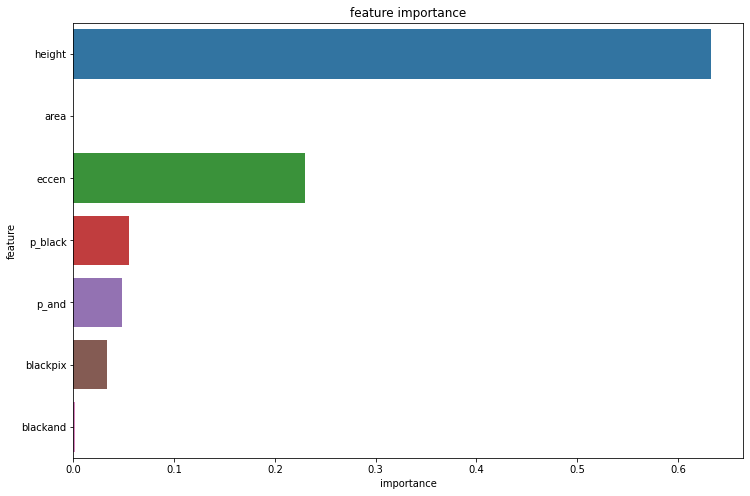

In [88]:
plt.figure(figsize=(12,8))
data=pd.DataFrame({'feature':df.drop(["lenght", "mean_tr", "wb_trans","target"],axis=1).columns,"importance":model_tree.feature_importances_})
sns.barplot(data=data,y='feature',x='importance')
plt.title('feature importance')

Here the features importance differs consequently form the classical models

We do the same for Random Forest and Bagging

### Random Forest

In [89]:
param_grid_forest={
    "max_depth" : np.arange(1, 15, 1),
    "n_estimators": np.arange(100, 500, 100),
    #"min_samples_split": np.arange(1, 20, 1),
    #"max_features": ["auto", "sqrt", "log2"],
    #"criterion":["gini", "entropy"]
}

grid_forest = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid_forest,
    scoring="accuracy"
)

grid_forest.fit(x, y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'n_estimators': array([100, 200, 300, 400])},
             scoring='accuracy')

In [90]:
grid_forest.best_estimator_

RandomForestClassifier(max_depth=14)

In [91]:
model_random = RandomForestClassifier(max_depth=13, n_estimators=200)
model_random.fit(x_train,y_train)
y_pred_forest=model_random.predict(x_test)
metric = tf.keras.metrics.Accuracy()
metric.update_state(y_test,y_pred_forest)
print('Random Forest accuracy  :', round(metric.result().numpy(),4))

Random Forest accuracy  : 0.9717


In [92]:
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

           1       0.98      0.99      0.99      1000
           2       0.89      0.87      0.88        54
           3       1.00      1.00      1.00         4
           4       0.89      0.94      0.91        17
           5       0.67      0.40      0.50        20

    accuracy                           0.97      1095
   macro avg       0.88      0.84      0.86      1095
weighted avg       0.97      0.97      0.97      1095



### Bagging

In [93]:
param_grid_bagging = {
    "n_estimators": np.arange(100, 400, 100),
    "max_samples" : np.arange(2, 20, 2),
    "bootstrap" : [True,False],
    
}
grid_bagging = GridSearchCV(
    estimator=BaggingClassifier(),
    param_grid=param_grid_bagging,
    scoring="accuracy"
)

grid_bagging.fit(x, y)


GridSearchCV(estimator=BaggingClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_samples': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'n_estimators': array([100, 200, 300])},
             scoring='accuracy')

In [94]:
grid_bagging.best_estimator_

BaggingClassifier(max_samples=18, n_estimators=300)

In [95]:
model_bagging = BaggingClassifier(n_estimators=100)
model_bagging.fit(x_train,y_train)
y_pred_bagging=model_bagging.predict(x_test)
metric = tf.keras.metrics.Accuracy()
metric.update_state(y_test,y_pred_bagging)
print('Bagging accuracy  :', round(metric.result().numpy(),4))

Bagging accuracy  : 0.9726


In [96]:
print(classification_report(y_test, y_pred_bagging))

              precision    recall  f1-score   support

           1       0.98      0.99      0.99      1000
           2       0.90      0.85      0.88        54
           3       1.00      1.00      1.00         4
           4       0.89      0.94      0.91        17
           5       0.73      0.40      0.52        20

    accuracy                           0.97      1095
   macro avg       0.90      0.84      0.86      1095
weighted avg       0.97      0.97      0.97      1095



We save the models to use them later for flask app

In [97]:

import pickle
import joblib
filename = "random_forest_model.pkl"
joblib.dump(model_random, filename)

filename = "decision_tree_model.pkl"
joblib.dump(model_tree, filename)

filename = "bagging_model.pkl"
joblib.dump(model_bagging, filename)

['bagging_model.pkl']